In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
import skimage.io
import os
from PIL import Image
from os import listdir
%matplotlib inline


C:\Users\arpit\AppData\Local\Temp\ipykernel_19012\1521909780.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from PIL import Image
import os

# Specify the path to your image folder
folder_path = 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images'


# List all files in the folder
file_list = os.listdir(folder_path)

# Load images into a list
images = []
for file in file_list:
    # Check if the file is an image
    if file.endswith('.jpg') or file.endswith('.png'):
        # Open the image and append it to the list
        img = Image.open(os.path.join(folder_path, file))
        images.append(img)

# Now 'images' contains all the images from the folder


In [3]:
base_dir_train= 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images'

In [4]:
images_train=os.listdir(base_dir_train)
type(images_train)
len(images_train)

3662

In [5]:
import os
# Get a list of all files in the directory
file_list = os.listdir(base_dir_train)

# Filter the list to include only image files (extensions: .png, .jpg, .jpeg, .gif, .bmp)
image_extensions = ['.png', '.jpg', '.jpeg', '.gif', '.bmp']
image_files_train = [os.path.join(base_dir_train, file_name) for file_name in file_list if any(file_name.lower().endswith(ext) for ext in image_extensions)]

# Now 'image_files' is a list containing the file paths of all image files in the directory
print(image_files_train)


['C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\000c1434d8d7.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\001639a390f0.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\0024cdab0c1e.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\002c21358ce6.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\005b95c28852.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\0083ee8054ee.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\0097f532ac9f.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\00a8624548a9.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\00b74780d31d.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\00cb6555d108.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\00cc2b75cddd.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\00e4ddff966a.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\00f6c1be5a33.png', 'C:/Users/arpit/Documents/mthd=-/Gree

In [6]:
import cv2

'''def histogram_equalization(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply histogram equalization
    equalized = cv2.equalizeHist(gray)
    return equalized'''

def apply_clahe(image, clip_limit=2.0, grid_size=(8, 8)):
    # Convert the image to grayscale if it's not already
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Ensure the image is of the correct data type
    if image.dtype != np.uint8:
        image = image.astype(np.uint8)
    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=grid_size)
    clahe_output = clahe.apply(image)
    return clahe_output

'''def apply_adaptive_median(image, kernel_size=3):
    # Apply Adaptive Median filter
    filtered_image = cv2.medianBlur(image, kernel_size)
    return filtered_image'''
    
def equalize_images_with_adaptive_median(image_paths):
    equalized_images = []
    for path in image_paths:
        # Read the image
        image = cv2.imread(path)
        # Apply histogram equalization
        #equalized_image = histogram_equalization(image)
        # Apply CLAHE
        clahe_output = apply_clahe(image)
        # Apply Adaptive Median filter
        #blurred_image = apply_adaptive_median(equalized_image)
        equalized_images.append(clahe_output)
    return equalized_images

# Example usage:
image_paths = image_files_train  # Assuming image_files_train contains the paths to your image files
equalized_images_with_adaptive_median = equalize_images_with_adaptive_median(image_paths)


In [7]:
import os
# Get a list of all files in the directory
file_list = os.listdir(base_dir_train)

# Filter the list to include only image files (extensions: .png, .jpg, .jpeg, .gif, .bmp)
image_extensions = ['.png', '.jpg', '.jpeg', '.gif', '.bmp']
image_files_train = [os.path.join(base_dir_train, file_name) for file_name in file_list if any(file_name.lower().endswith(ext) for ext in image_extensions)]

# Now 'image_files' is a list containing the file paths of all image files in the directory
print(image_files_train)


['C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\000c1434d8d7.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\001639a390f0.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\0024cdab0c1e.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\002c21358ce6.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\005b95c28852.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\0083ee8054ee.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\0097f532ac9f.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\00a8624548a9.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\00b74780d31d.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\00cb6555d108.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\00cc2b75cddd.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\00e4ddff966a.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\00f6c1be5a33.png', 'C:/Users/arpit/Documents/mthd=-/Gree

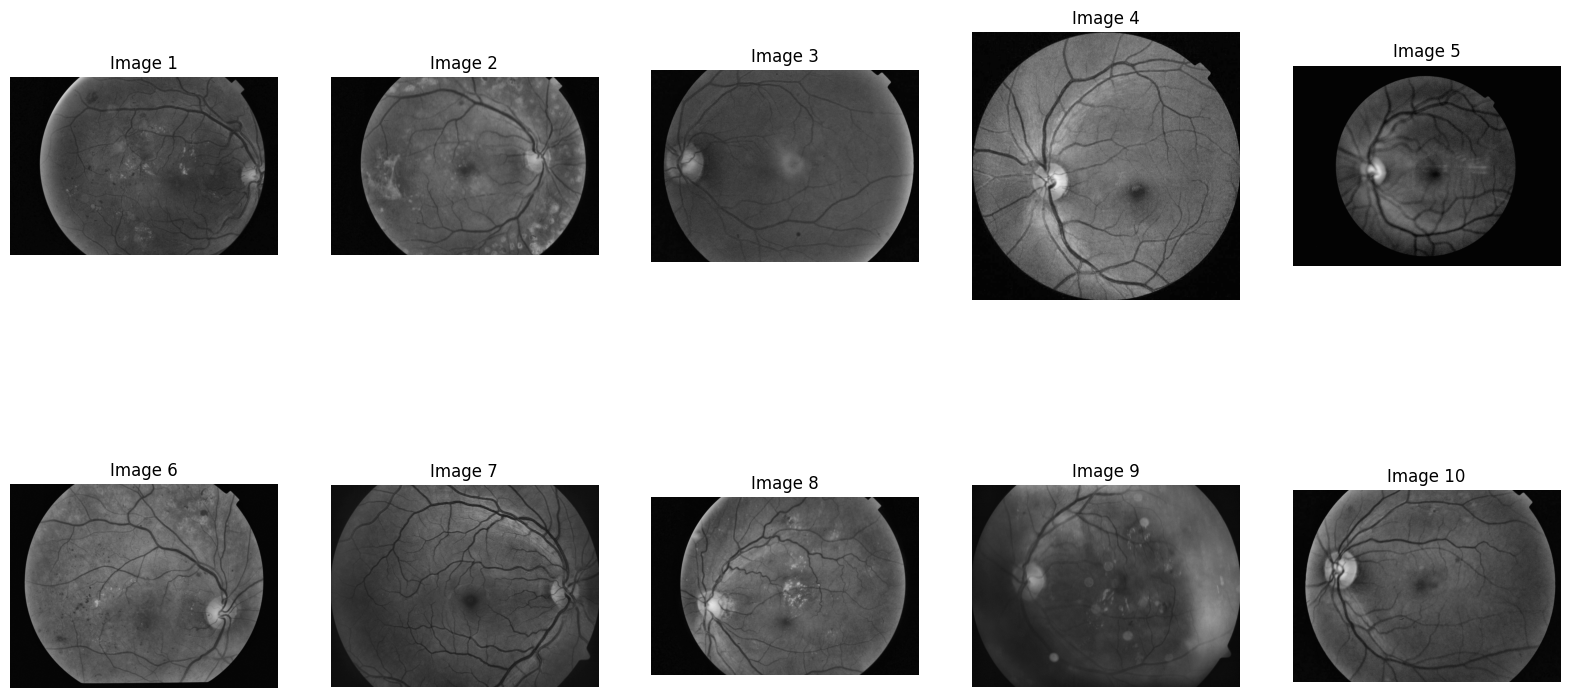

In [8]:
# Assuming equalized_images_with_gaussian contains the processed images
# Display the first 10 images
plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(cv2.cvtColor(equalized_images_with_adaptive_median[i], cv2.COLOR_BGR2RGB))
    plt.title(f'Image {i+1}')
    plt.axis('off')

plt.show()


In [ ]:
import cv2
import numpy as np
import pandas as pd
import os
from skimage import feature

image_path = image_files_train
# Function to extract LBP features from an image
def extract_lbp_features(image):
    if len(image.shape) > 2:  # Check if the image is not grayscale
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    radius = 3
    n_points = 8 * radius
    method = 'uniform'
    lbp_image = feature.local_binary_pattern(image, n_points, radius, method)
    hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist

# Initialize lists to store image names and features
image_names = []
lbp_features_list = []

# Extract LBP features for each image in the list equalized_images_with_gaussian
for i, image in enumerate(equalized_images_with_adaptive_median):
    features = extract_lbp_features(image)
    lbp_features_list.append(features)

    # Store image names as 'Image_X' where X is the index of the image in the list
    image_name = os.path.splitext(os.path.basename(image_path[i]))[0]
    image_names.append(image_name)

# Convert the lists of names and features to a DataFrame
data = np.array(lbp_features_list)
df = pd.DataFrame(data, columns=[f'Feature_{i}' for i in range(data.shape[1])])
df.insert(0, 'Image_Name', image_names)

# Save the DataFrame to a CSV file
df.to_csv('lbp_features_with_names_equalized_images_clahe.csv', index=False)


In [3]:
df=pd.read_csv('lbp_features_with_names_equalized_images_clahe.csv')

In [4]:
df

,Image_Name,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25
0,000c1434d8d7,0.042554,0.017560,0.017914,0.018880,0.012169,0.010532,0.008395,0.010117,0.011713,...,0.013226,0.025694,0.016736,0.019483,0.020898,0.025639,0.025648,0.019027,0.233570,0.333600
1,001639a390f0,0.028920,0.012541,0.014215,0.018614,0.009887,0.008726,0.007303,0.010059,0.012546,...,0.018736,0.035396,0.022682,0.024502,0.024493,0.028139,0.025786,0.017349,0.247175,0.271259
2,0024cdab0c1e,0.055558,0.022696,0.022245,0.019528,0.012833,0.010049,0.007365,0.007412,0.007531,...,0.009724,0.017700,0.013365,0.017683,0.021589,0.027343,0.029214,0.022619,0.205089,0.397598
3,002c21358ce6,0.057620,0.022604,0.022119,0.018689,0.012871,0.010150,0.008608,0.009290,0.010101,...,0.010547,0.017114,0.011944,0.013852,0.016676,0.022262,0.025585,0.022044,0.172901,0.393711
4,005b95c28852,0.036239,0.018998,0.012973,0.007444,0.004409,0.002927,0.002209,0.002007,0.001812,...,0.001829,0.004273,0.002357,0.003174,0.004624,0.008226,0.013420,0.018216,0.554680,0.279833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,ffa47f6a7bf4,0.042771,0.016686,0.017757,0.018391,0.013204,0.011850,0.009477,0.010887,0.012027,...,0.013084,0.019963,0.015824,0.019422,0.020976,0.024653,0.024253,0.017660,0.264314,0.321349
3658,ffc04fed30e6,0.035401,0.018679,0.012518,0.007284,0.004388,0.003007,0.002375,0.002267,0.002144,...,0.002237,0.004590,0.002469,0.003201,0.004757,0.008111,0.013107,0.018243,0.553926,0.277553
3659,ffcf7b45f213,0.029063,0.012357,0.013894,0.017652,0.010118,0.009197,0.008102,0.011118,0.014307,...,0.019165,0.033474,0.021343,0.022652,0.022676,0.026210,0.024152,0.016555,0.235697,0.264028
3660,ffd97f8cd5aa,0.059677,0.023555,0.023145,0.018785,0.012833,0.009805,0.007882,0.008583,0.009555,...,0.009619,0.015851,0.010715,0.012668,0.015379,0.021462,0.026358,0.022829,0.173351,0.405130


In [5]:
df_csv = pd.read_csv('train.csv')

In [6]:
merged_df = pd.merge(df, df_csv, left_on='Image_Name', right_on='id_code', how='inner')
print(merged_df)

        Image_Name  Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  \
0     000c1434d8d7   0.042554   0.017560   0.017914   0.018880   0.012169   
1     001639a390f0   0.028920   0.012541   0.014215   0.018614   0.009887   
2     0024cdab0c1e   0.055558   0.022696   0.022245   0.019528   0.012833   
3     002c21358ce6   0.057620   0.022604   0.022119   0.018689   0.012871   
4     005b95c28852   0.036239   0.018998   0.012973   0.007444   0.004409   
...            ...        ...        ...        ...        ...        ...   
3657  ffa47f6a7bf4   0.042771   0.016686   0.017757   0.018391   0.013204   
3658  ffc04fed30e6   0.035401   0.018679   0.012518   0.007284   0.004388   
3659  ffcf7b45f213   0.029063   0.012357   0.013894   0.017652   0.010118   
3660  ffd97f8cd5aa   0.059677   0.023555   0.023145   0.018785   0.012833   
3661  ffec9a18a3ce   0.064563   0.041256   0.017148   0.009887   0.006427   

      Feature_5  Feature_6  Feature_7  Feature_8  ...  Feature_18  Feature_

In [7]:
merged_df = merged_df.drop('id_code', axis =1)

In [8]:
merged_df

,Image_Name,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,diagnosis
0,000c1434d8d7,0.042554,0.017560,0.017914,0.018880,0.012169,0.010532,0.008395,0.010117,0.011713,...,0.025694,0.016736,0.019483,0.020898,0.025639,0.025648,0.019027,0.233570,0.333600,2
1,001639a390f0,0.028920,0.012541,0.014215,0.018614,0.009887,0.008726,0.007303,0.010059,0.012546,...,0.035396,0.022682,0.024502,0.024493,0.028139,0.025786,0.017349,0.247175,0.271259,4
2,0024cdab0c1e,0.055558,0.022696,0.022245,0.019528,0.012833,0.010049,0.007365,0.007412,0.007531,...,0.017700,0.013365,0.017683,0.021589,0.027343,0.029214,0.022619,0.205089,0.397598,1
3,002c21358ce6,0.057620,0.022604,0.022119,0.018689,0.012871,0.010150,0.008608,0.009290,0.010101,...,0.017114,0.011944,0.013852,0.016676,0.022262,0.025585,0.022044,0.172901,0.393711,0
4,005b95c28852,0.036239,0.018998,0.012973,0.007444,0.004409,0.002927,0.002209,0.002007,0.001812,...,0.004273,0.002357,0.003174,0.004624,0.008226,0.013420,0.018216,0.554680,0.279833,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,ffa47f6a7bf4,0.042771,0.016686,0.017757,0.018391,0.013204,0.011850,0.009477,0.010887,0.012027,...,0.019963,0.015824,0.019422,0.020976,0.024653,0.024253,0.017660,0.264314,0.321349,2
3658,ffc04fed30e6,0.035401,0.018679,0.012518,0.007284,0.004388,0.003007,0.002375,0.002267,0.002144,...,0.004590,0.002469,0.003201,0.004757,0.008111,0.013107,0.018243,0.553926,0.277553,0
3659,ffcf7b45f213,0.029063,0.012357,0.013894,0.017652,0.010118,0.009197,0.008102,0.011118,0.014307,...,0.033474,0.021343,0.022652,0.022676,0.026210,0.024152,0.016555,0.235697,0.264028,2
3660,ffd97f8cd5aa,0.059677,0.023555,0.023145,0.018785,0.012833,0.009805,0.007882,0.008583,0.009555,...,0.015851,0.010715,0.012668,0.015379,0.021462,0.026358,0.022829,0.173351,0.405130,0


In [9]:
merged_df['diagnosis'] = merged_df['diagnosis'].apply(lambda x: 1 if x != 0 else x)

In [10]:
merged_df['diagnosis']

0       1
1       1
2       1
3       0
4       0
       ..
3657    1
3658    0
3659    1
3660    0
3661    1
Name: diagnosis, Length: 3662, dtype: int64

In [11]:
merged_df

,Image_Name,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,diagnosis
0,000c1434d8d7,0.042554,0.017560,0.017914,0.018880,0.012169,0.010532,0.008395,0.010117,0.011713,...,0.025694,0.016736,0.019483,0.020898,0.025639,0.025648,0.019027,0.233570,0.333600,1
1,001639a390f0,0.028920,0.012541,0.014215,0.018614,0.009887,0.008726,0.007303,0.010059,0.012546,...,0.035396,0.022682,0.024502,0.024493,0.028139,0.025786,0.017349,0.247175,0.271259,1
2,0024cdab0c1e,0.055558,0.022696,0.022245,0.019528,0.012833,0.010049,0.007365,0.007412,0.007531,...,0.017700,0.013365,0.017683,0.021589,0.027343,0.029214,0.022619,0.205089,0.397598,1
3,002c21358ce6,0.057620,0.022604,0.022119,0.018689,0.012871,0.010150,0.008608,0.009290,0.010101,...,0.017114,0.011944,0.013852,0.016676,0.022262,0.025585,0.022044,0.172901,0.393711,0
4,005b95c28852,0.036239,0.018998,0.012973,0.007444,0.004409,0.002927,0.002209,0.002007,0.001812,...,0.004273,0.002357,0.003174,0.004624,0.008226,0.013420,0.018216,0.554680,0.279833,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,ffa47f6a7bf4,0.042771,0.016686,0.017757,0.018391,0.013204,0.011850,0.009477,0.010887,0.012027,...,0.019963,0.015824,0.019422,0.020976,0.024653,0.024253,0.017660,0.264314,0.321349,1
3658,ffc04fed30e6,0.035401,0.018679,0.012518,0.007284,0.004388,0.003007,0.002375,0.002267,0.002144,...,0.004590,0.002469,0.003201,0.004757,0.008111,0.013107,0.018243,0.553926,0.277553,0
3659,ffcf7b45f213,0.029063,0.012357,0.013894,0.017652,0.010118,0.009197,0.008102,0.011118,0.014307,...,0.033474,0.021343,0.022652,0.022676,0.026210,0.024152,0.016555,0.235697,0.264028,1
3660,ffd97f8cd5aa,0.059677,0.023555,0.023145,0.018785,0.012833,0.009805,0.007882,0.008583,0.009555,...,0.015851,0.010715,0.012668,0.015379,0.021462,0.026358,0.022829,0.173351,0.405130,0


In [12]:
#from sklearn.metrics import confusion_matrix

def calculate_distances_with_names(query_image, image_database):
    query_features = query_image[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                  'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                  'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
                                  'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17',
                                  'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23',
                                  'Feature_24', 'Feature_25']].values
    database_features = image_database[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                        'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                        'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
                                  'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17',
                                  'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23',
                                  'Feature_24', 'Feature_25']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)

    distances = np.linalg.norm(database_features - query_features, ord =1,axis=1)
    image_names = image_database['Image_Name'].values
    return distances, image_names

def retrieve_similar_images(query_image, image_database):
    distances, image_names = calculate_distances_with_names(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[0:10]
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_indices = sorted_indices
    return similar_images_indices

precision_list = []
recall_list = []
all_predicted_labels = []
all_true_labels = []

for i in range(3662):  # Loop through all query images
    query_image = merged_df.iloc[i]
    image_database = merged_df  # Your main dataset containing images

        # Retrieving similar images
    similar_images_indices = retrieve_similar_images(query_image, image_database)

    # Extracting classes of query image and retrieved images
    query_class = query_image['diagnosis']
    retrieved_classes = image_database.iloc[similar_images_indices]['diagnosis'].values

        # Calculating precision and recall
    relevant_images = np.count_nonzero(retrieved_classes == query_class)
    precision = relevant_images /10  # Assuming you retrieve top 10 similar images
    recall = relevant_images / len(image_database[image_database['diagnosis'] == query_class])

    precision_list.append(precision)
    recall_list.append(recall)


# Computing average precision and recall
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)


Average Precision: 0.9100491534680503
Average Recall: 0.00497100383989857


In [13]:
#from sklearn.metrics import confusion_matrix

def calculate_distances_with_names(query_image, image_database):
    query_features = query_image[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                  'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                  'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
                                  'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17',
                                  'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23',
                                  'Feature_24', 'Feature_25']].values
    database_features = image_database[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                        'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                        'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
                                  'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17',
                                  'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23',
                                  'Feature_24', 'Feature_25']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)

    distances = np.linalg.norm(database_features - query_features, axis=1)
    image_names = image_database['Image_Name'].values
    return distances, image_names

def retrieve_similar_images(query_image, image_database):
    distances, image_names = calculate_distances_with_names(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[0:10]
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_indices = sorted_indices
    return similar_images_indices

precision_list = []
recall_list = []
all_predicted_labels = []
all_true_labels = []

for i in range(3662):  # Loop through all query images
    query_image = merged_df.iloc[i]
    image_database = merged_df  # Your main dataset containing images

        # Retrieving similar images
    similar_images_indices = retrieve_similar_images(query_image, image_database)

    # Extracting classes of query image and retrieved images
    query_class = query_image['diagnosis']
    retrieved_classes = image_database.iloc[similar_images_indices]['diagnosis'].values

        # Calculating precision and recall
    relevant_images = np.count_nonzero(retrieved_classes == query_class)
    precision = relevant_images /10  # Assuming you retrieve top 10 similar images
    recall = relevant_images / len(image_database[image_database['diagnosis'] == query_class])

    precision_list.append(precision)
    recall_list.append(recall)


# Computing average precision and recall
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)


Average Precision: 0.9045057345712726
Average Recall: 0.004940665180151772


In [14]:
def calculate_distances_with_names_jaccard(query_image, image_database):
    query_features = query_image[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                  'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                  'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
                                  'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17',
                                  'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23',
                                  'Feature_24', 'Feature_25']].values
    database_features = image_database[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                        'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                        'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
                                  'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17',
                                  'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23',
                                  'Feature_24', 'Feature_25']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)

    # Convert binary values based on a threshold (e.g., >0.5 as 1, else 0)
    query_features_bin = (query_features > 0.5).astype(int)
    database_features_bin = (database_features > 0.5).astype(int)

    # Compute Jaccard similarity
    intersection = np.sum(np.minimum(query_features_bin, database_features_bin), axis=1)
    union = np.sum(np.maximum(query_features_bin, database_features_bin), axis=1)

    # Avoid division by zero, replace the division by zero with NaN
    with np.errstate(divide='ignore', invalid='ignore'):  # Ignore division by zero errors
        jaccard_sim = np.divide(intersection, union, out=np.zeros_like(union, dtype=float), where=union != 0)
        distances = 1 - jaccard_sim  # Convert similarity to distance

    image_names = image_database['Image_Name'].values
    return distances, image_names



# Use calculate_distances_with_names_jaccard in your loop for Jaccard similarity

def retrieve_similar_images_jaccard(query_image, image_database):
    distances, image_names = calculate_distances_with_names_jaccard(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[:10]
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_indices = sorted_indices
    return similar_images_indices

precision_list = []
recall_list = []

for i in range(3662):  # Loop through all query images
    query_image = merged_df.iloc[i]
    image_database = merged_df  # Your main dataset containing images

    # Retrieving similar images
    similar_images_indices = retrieve_similar_images_jaccard(query_image, image_database)

    # Extracting classes of query image and retrieved images
    query_class = query_image['diagnosis']
    retrieved_classes = image_database.iloc[similar_images_indices]['diagnosis'].values

    # Calculating precision and recall
    relevant_images = np.count_nonzero(retrieved_classes == query_class)
    precision = relevant_images / 10  # Assuming you retrieve top 10 similar images
    recall = relevant_images / len(image_database[image_database['diagnosis'] == query_class])

    precision_list.append(precision)
    recall_list.append(recall)

# Computing average precision and recall
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)


Average Precision: 0.5938831239759693
Average Recall: 0.00323660393910569


In [15]:
def calculate_distances_with_names_cosine(query_image, image_database):
    query_features = query_image[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                  'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                  'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
                                  'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17',
                                  'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23',
                                  'Feature_24', 'Feature_25']].values
    database_features = image_database[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                        'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                        'Feature_8', 'Feature_9','Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
                                  'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17',
                                  'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23',
                                  'Feature_24', 'Feature_25']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)

    # Calculate dot product between query and database vectors
    dot_product = np.dot(database_features, query_features)

    # Calculate magnitudes of the vectors
    query_magnitude = np.linalg.norm(query_features)
    database_magnitudes = np.linalg.norm(database_features, axis=1)

    # Calculate cosine similarity
    cosine_sim = dot_product / (query_magnitude * database_magnitudes)

    # Convert similarity to distance
    distances = 1 - cosine_sim

    image_names = image_database['Image_Name'].values
    return distances, image_names

# Use calculate_distances_with_names_cosine in your loop for Cosine Similarity

def retrieve_similar_images_cosine(query_image, image_database):
    distances, image_names = calculate_distances_with_names_cosine(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[:10]
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_indices = sorted_indices
    return similar_images_indices

precision_list = []
recall_list = []

for i in range(3662):  # Loop through all query images
    query_image = merged_df.iloc[i]
    image_database = merged_df  # Your main dataset containing images

    # Retrieving similar images
    similar_images_indices = retrieve_similar_images_cosine(query_image, image_database)

    # Extracting classes of query image and retrieved images
    query_class = query_image['diagnosis']
    retrieved_classes = image_database.iloc[similar_images_indices]['diagnosis'].values

    # Calculating precision and recall
    relevant_images = np.count_nonzero(retrieved_classes == query_class)
    precision = relevant_images / 10  # Assuming you retrieve top 10 similar images
    recall = relevant_images / len(image_database[image_database['diagnosis'] == query_class])

    precision_list.append(precision)
    recall_list.append(recall)

# Computing average precision and recall
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)


Average Precision: 0.9101310759148008
Average Recall: 0.0049713729760773925


In [16]:
# Assuming 'df' is your DataFrame
rows_with_diagnosis_0 = merged_df[merged_df['diagnosis'] == 0]
rows_with_diagnosis_1 = merged_df[merged_df['diagnosis'] == 1]


In [17]:
rows_with_diagnosis_0

,Image_Name,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,diagnosis
3,002c21358ce6,0.057620,0.022604,0.022119,0.018689,0.012871,0.010150,0.008608,0.009290,0.010101,...,0.017114,0.011944,0.013852,0.016676,0.022262,0.025585,0.022044,0.172901,0.393711,0
4,005b95c28852,0.036239,0.018998,0.012973,0.007444,0.004409,0.002927,0.002209,0.002007,0.001812,...,0.004273,0.002357,0.003174,0.004624,0.008226,0.013420,0.018216,0.554680,0.279833,0
6,0097f532ac9f,0.057924,0.035554,0.018163,0.012319,0.009100,0.007426,0.006262,0.006842,0.007388,...,0.007411,0.007173,0.009115,0.011459,0.017953,0.026654,0.035853,0.086804,0.540469,0
10,00cc2b75cddd,0.056037,0.022357,0.022494,0.018524,0.012757,0.010442,0.008484,0.009261,0.010403,...,0.017057,0.012462,0.014740,0.017540,0.023250,0.026060,0.021673,0.157541,0.393304,0
12,00f6c1be5a33,0.059347,0.023333,0.022543,0.017650,0.011954,0.009024,0.007356,0.008153,0.009197,...,0.014518,0.009789,0.011995,0.014570,0.020684,0.025206,0.023026,0.191536,0.404037,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,ff4cd992667b,0.057264,0.035097,0.018429,0.012426,0.008958,0.007427,0.006368,0.007025,0.007701,...,0.007459,0.007016,0.008845,0.011089,0.017441,0.026092,0.035740,0.084880,0.540017,0
3653,ff59d44a70a7,0.060887,0.024189,0.023693,0.019664,0.012990,0.009722,0.008083,0.008194,0.008929,...,0.013834,0.010910,0.013544,0.016856,0.023136,0.027900,0.023683,0.162399,0.413896,0
3654,ff631653374e,0.061089,0.024270,0.022961,0.018115,0.011611,0.008448,0.006893,0.007399,0.008343,...,0.013937,0.009400,0.010946,0.013819,0.020316,0.025078,0.023732,0.195098,0.414433,0
3658,ffc04fed30e6,0.035401,0.018679,0.012518,0.007284,0.004388,0.003007,0.002375,0.002267,0.002144,...,0.004590,0.002469,0.003201,0.004757,0.008111,0.013107,0.018243,0.553926,0.277553,0


In [18]:
#from sklearn.metrics import confusion_matrix

def calculate_distances_with_names(query_image, image_database):
    query_features = query_image[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                  'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                  'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
                                  'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17',
                                  'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23',
                                  'Feature_24', 'Feature_25']].values
    database_features = image_database[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                  'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                  'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
                                  'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17',
                                  'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23',
                                  'Feature_24', 'Feature_25']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)

    distances = np.linalg.norm(database_features - query_features, ord =1,axis=1)
    image_names = image_database['Image_Name'].values
    return distances, image_names

def retrieve_similar_images(query_image, image_database):
    distances, image_names = calculate_distances_with_names(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[0:10]
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_indices = sorted_indices
    return similar_images_indices

precision_list = []
recall_list = []
all_predicted_labels = []
all_true_labels = []

for i in range(3662):  # Loop through all query images
    query_image = merged_df.iloc[i]
    image_database = merged_df  # Your main dataset containing images

        # Retrieving similar images
    similar_images_indices = retrieve_similar_images(query_image, image_database)

    # Extracting classes of query image and retrieved images
    query_class = query_image['diagnosis']
    retrieved_classes = image_database.iloc[similar_images_indices]['diagnosis'].values

        # Calculating precision and recall
    relevant_images = np.count_nonzero(retrieved_classes == query_class)
    precision = relevant_images /10  # Assuming you retrieve top 10 similar images
    recall = relevant_images / len(image_database[image_database['diagnosis'] == query_class])

    precision_list.append(precision)
    recall_list.append(recall)


# Computing average precision and recall
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)


Average Precision: 0.9100491534680503
Average Recall: 0.00497100383989857


In [19]:
#from sklearn.metrics import confusion_matrix

def calculate_distances_with_names(query_image, image_database):
    query_features = query_image[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                  'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                  'Feature_8', 'Feature_9','Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
                                  'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17',
                                  'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23',
                                  'Feature_24', 'Feature_25']].values
    database_features = image_database[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                        'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                        'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13',
                                  'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17',
                                  'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23',
                                  'Feature_24', 'Feature_25']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)

    distances = np.linalg.norm(database_features - query_features, axis=1)
    image_names = image_database['Image_Name'].values
    return distances, image_names

def retrieve_similar_images(query_image, image_database):
    distances, image_names = calculate_distances_with_names(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[0:10]
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_indices = sorted_indices
    return similar_images_indices

precision_list = []
recall_list = []
all_predicted_labels = []
all_true_labels = []

for i in range(1857):  # Loop through all query images
    query_image = rows_with_diagnosis_1.iloc[i]
    image_database = merged_df  # Your main dataset containing images

        # Retrieving similar images
    similar_images_indices = retrieve_similar_images(query_image, image_database)

    # Extracting classes of query image and retrieved images
    query_class = query_image['diagnosis']
    retrieved_classes = image_database.iloc[similar_images_indices]['diagnosis'].values

        # Calculating precision and recall
    relevant_images = np.count_nonzero(retrieved_classes == query_class)
    precision = relevant_images /10  # Assuming you retrieve top 10 similar images
    recall = relevant_images / len(image_database[image_database['diagnosis'] == query_class])

    precision_list.append(precision)
    recall_list.append(recall)


# Computing average precision and recall
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)


Average Precision: 0.8954765751211632
Average Recall: 0.004822167878950798


In [20]:
def retrieve_similar_images(query_image, image_database, count):
    distances, image_names = calculate_distances_with_names(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[:count]
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_indices = sorted_indices
    return similar_images_indices


In [21]:
# Your existing code...

# Define a list of retrieval image counts to loop through
retrieval_counts = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Loop through different retrieval counts
for count in retrieval_counts:
    precision_list = []
    recall_list = []

    for i in range(3662):  # Loop through all query images
        query_image = merged_df.iloc[i]
        image_database = merged_df  # Your main dataset containing images

        # Retrieving similar images
        similar_images_indices = retrieve_similar_images(query_image, image_database, count)

        # Extracting classes of query image and retrieved images
        query_class = query_image['diagnosis']
        retrieved_classes = image_database.iloc[similar_images_indices]['diagnosis'].values

        # Calculating precision and recall
        relevant_images = np.count_nonzero(retrieved_classes == query_class)
        precision = relevant_images / count  # Use the current retrieval count
        recall = relevant_images / len(image_database[image_database['diagnosis'] == query_class])

        precision_list.append(precision)
        recall_list.append(recall)

    # Computing average precision and recall for the current retrieval count
    average_precision = np.mean(precision_list)
    average_recall = np.mean(recall_list)

    print(f"Retrieval Count: {count}")
    print("Average Precision:", average_precision)
    print("Average Recall:", average_recall)
    print("\n")


Retrieval Count: 10
Average Precision: 0.9045057345712726
Average Recall: 0.004940665180151772


Retrieval Count: 20
Average Precision: 0.8923675587110869
Average Recall: 0.009748966240893138


Retrieval Count: 30
Average Precision: 0.8866102312033497
Average Recall: 0.014529015796989286


Retrieval Count: 40
Average Precision: 0.8826051338066632
Average Recall: 0.019284390909178148


Retrieval Count: 50
Average Precision: 0.8787657018022939
Average Recall: 0.02400079913949998


Retrieval Count: 60
Average Precision: 0.8757418532677954
Average Recall: 0.02870175057647303


Retrieval Count: 70
Average Precision: 0.8732503706015449
Average Recall: 0.03339013484515284


Retrieval Count: 80
Average Precision: 0.8703952758055706
Average Recall: 0.038035741599516205


Retrieval Count: 90
Average Precision: 0.86732204624067
Average Recall: 0.042639340558966704


Retrieval Count: 100
Average Precision: 0.8639077007099946
Average Recall: 0.04719088260001686




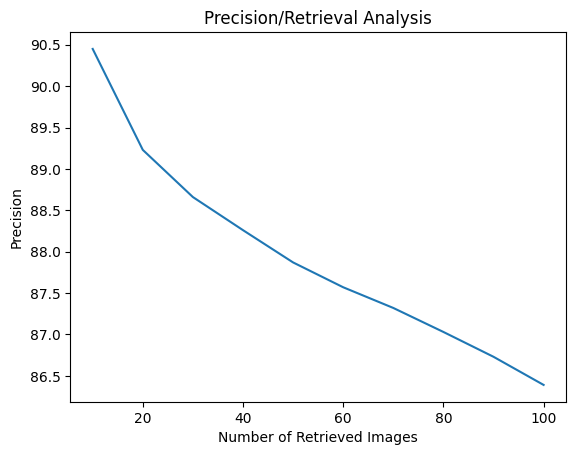

In [23]:
import matplotlib.pyplot as plt

# Sample data
x_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # X-axis values
y_values = [90.45,89.23,88.66,88.26,87.87,87.57,87.32,87.03,86.73,86.39]  # Y-axis values

# Plotting the line graph
plt.plot(x_values, y_values)

# Adding labels and title
plt.ylabel('Precision')
plt.xlabel('Number of Retrieved Images')
plt.title('Precision/Retrieval Analysis')

# Display the plot
plt.show()
